# Problem E.  
### Input: A graph G

Find: a fractal dimension of G. It is defined by an optimal partition of a graph into cliques in such a way that every edge is covered by some clique from the partition. For a given partition, we color the cliques in such a way that intersecting cliques have different colors; the number of colors is the chromatic number of the partition. The goal is to find a partition with the minimal chromatic number; this number divided by the number of vertices is a fractal dimension of a graph.
<br/><br/>
Example:
<img src="question_example.png" width="800" />
<br/>
<img src="question with node numbering.png" width="800" />

In [31]:
import networkx as nx
import itertools
import random
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8])
G.add_edges_from([(1,2)(2,3), (2,4), (3,4), (3,5), (4,5), (5,6), (5,7), (6,8), (7,8)])

In [32]:
number_edges = G.number_of_edges()

In [33]:
number_edges

9

In [34]:
number_nodes = G.number_of_nodes()

In [35]:
number_nodes

8

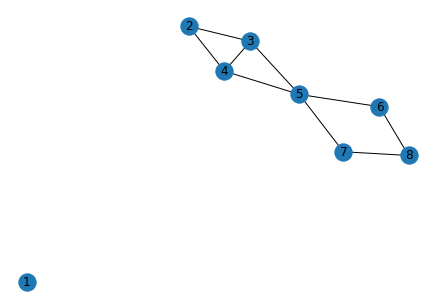

In [36]:
nx.draw_spring(G, with_labels = True)

In [37]:
cliques = []
for clique in nx.find_cliques(G):
    cliques.append(tuple(clique))

In [38]:
cliques

[(8, 6), (8, 7), (1,), (2, 3, 4), (5, 3, 4), (5, 6), (5, 7)]

In [39]:
G_prime = nx.Graph()

In [40]:
G_prime.add_nodes_from(cliques)

In [41]:
G_prime.number_of_nodes()

7

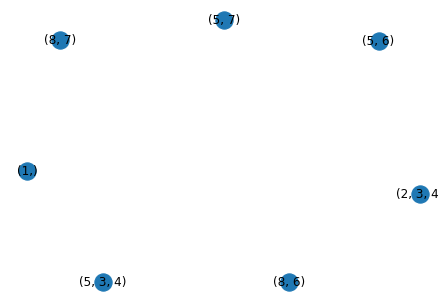

In [42]:
nx.draw_spring(G_prime, with_labels = True)

In [43]:
nodes_prime = list(G_prime.nodes)

In [44]:
n = len(nodes_prime)
for i in range(n-1):
    for j in range(i+1, n):
        if(set(nodes_prime[i]) & set(nodes_prime[j])):
            G_prime.add_edge(nodes_prime[i], nodes_prime[j])

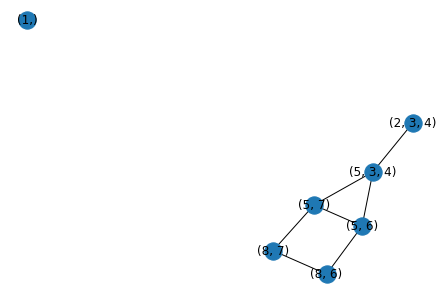

In [45]:
nx.draw_spring(G_prime, with_labels = True)

In [49]:
G_prime.nodes()

NodeView(((8, 6), (8, 7), (1,), (2, 3, 4), (5, 3, 4), (5, 6), (5, 7)))

In [46]:
edges = list(G_prime.edges())

In [47]:
for i in range(len(edges)):
    edges[i] = str(edges[i])

In [48]:
edges

['((8, 6), (8, 7))',
 '((8, 6), (5, 6))',
 '((8, 7), (5, 7))',
 '((2, 3, 4), (5, 3, 4))',
 '((5, 3, 4), (5, 6))',
 '((5, 3, 4), (5, 7))',
 '((5, 6), (5, 7))']

In [30]:
with open('edges.dat', 'w+') as f:
    for i in range(len(edges)):
        if i == len(edges) - 1:
            f.write(edges[i])
        else:
            f.write(edges[i])
            f.write(",")   

In [21]:
#start timer here
colors = nx.coloring.greedy_color(G_prime, strategy='DSATUR')
#end timer here

In [22]:
#get the number of colors used
colors = len(set(colors.values()))

In [23]:
fractal_dimension = colors/number_nodes

In [24]:
print("The Fractal dimension of this graph is", fractal_dimension)

The Fractal dimension of this graph is 0.375


In [25]:
if (3/8) == fractal_dimension:
    print("Your answer is matching with your output")

Your answer is matching with your output
